In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, GRU
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('hourly_load_data_1.csv')
df.head()

,Total_occupant,Total_load
0,0,3.356876
1,0,3.502624
2,0,3.726831
3,0,2.931956
4,0,2.881140


In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Total_occupant,Total_load
0,0,3.356876
1,0,3.502624
2,0,3.726831
3,0,2.931956
4,0,2.881140


In [5]:
df.describe()

,Total_occupant,Total_load
count,2592.000000,2592.000000
mean,33.295139,7.412673
std,92.936729,17.869472
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,3.069164
max,833.000000,96.526306


In [6]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [7]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['Total_load']])

In [8]:
Xs.shape

(2592, 2)

In [9]:
#Xs.reshape(1,662,6)

In [10]:
Ys.shape

(2592, 1)

In [11]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [12]:
X,Y = np.array(X), np.array(Y)

In [13]:
X_train1, y_train1 = X[:1814], Y[:1814]
#X_val1, y_val1 = X[3530:3971], Y[3530:3971]
X_test1, y_test1 = X[1814:], Y[1814:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((1814, 5, 2), (1814, 1), (773, 5, 2), (773, 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
model.add(GRU(units = 96, activation='relu', input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(units = 96, activation='relu',return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(units = 64, activation='relu',return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(units = 32, activation='relu',return_sequences=True,))
model.add(Dropout(0.1))
model.add(GRU(units = 32, activation='relu'))
model.add(Dropout(0.1))
# Adding the output layer   
model.add(Dense(units = 1,activation="linear"))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 96)             28800     
                                                                 
 dropout (Dropout)           (None, 5, 96)             0         
                                                                 
 gru_1 (GRU)                 (None, 5, 96)             55872     
                                                                 
 dropout_1 (Dropout)         (None, 5, 96)             0         
                                                                 
 gru_2 (GRU)                 (None, 5, 64)             31104     
                                                                 
 dropout_2 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_3 (GRU)                 (None, 5, 32)             9

In [16]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=100)
end= time.time()
continental= end-start
continental

Epoch 1/100
57/57 [==============================] - 11s 21ms/step - loss: 0.7091 - root_mean_squared_error: 0.8421
Epoch 2/100
57/57 [==============================] - 1s 21ms/step - loss: 0.2081 - root_mean_squared_error: 0.4561
Epoch 3/100
57/57 [==============================] - 1s 26ms/step - loss: 0.0810 - root_mean_squared_error: 0.2845
Epoch 4/100
57/57 [==============================] - 1s 23ms/step - loss: 0.0725 - root_mean_squared_error: 0.2692
Epoch 5/100
57/57 [==============================] - 1s 25ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617
Epoch 6/100
57/57 [==============================] - 1s 24ms/step - loss: 0.0654 - root_mean_squared_error: 0.2557
Epoch 7/100
57/57 [==============================] - 1s 21ms/step - loss: 0.0618 - root_mean_squared_error: 0.2486
Epoch 8/100
57/57 [==============================] - 1s 24ms/step - loss: 0.0584 - root_mean_squared_error: 0.2417
Epoch 9/100
57/57 [==============================] - 1s 19ms/step - loss: 0.055

117.90893530845642

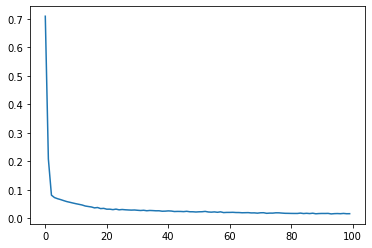

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
Yp

25/25 [==============================] - 1s 6ms/step


array([[-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.80727077e-01],
       [-9.8

In [19]:
Yp.shape

(773, 1)

In [20]:
pred= s2.inverse_transform(Yp)

In [21]:
Actual= s2.inverse_transform(y_test1)

In [22]:
x= pred
z= Actual

In [27]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [28]:
Calculated.to_csv(r"E:\Mam_iqra second paper\School of Design and Environment 4 (SDE4), Singapor\GRU\prediction.csv")

In [29]:
Actual.to_csv(r"E:\Mam_iqra second paper\School of Design and Environment 4 (SDE4), Singapor\GRU\Actual.csv")

In [1]:
import pandas as pd 
import numpy as np
df=pd.read_csv("output.csv")
features= list(df)
features

['Unnamed: 0', 'Actual', 'Prediction']

In [2]:
z= df["Actual"]
x= df["Prediction"]

In [4]:
from sklearn.metrics import mean_squared_error
import math

 
MSE = mean_squared_error(z,x)
 
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
MAE
max = x.max()
min = x.min()
NRMSE= (RMSE/(max-min))*100


print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)
print("Normalized Root Mean Square Error",NRMSE)

Root Mean Square Error: 7.7849090864105
Mean Square Error: 60.60480948367676
Mean Absolute Error: 3.1496954881966364
Normalized Root Mean Square Error 9.319539160296312
